In [1]:
'''
Name : Peter Sunny Shanthveer Markappa
Student Number: R00208303
Assignemnt : 01
Subject: Deep Learning
Submission Date: 03- April - 2022
'''
# Auto Encoder

'\nName : Peter Sunny Shanthveer Markappa\nStudent Number: R00208303\nAssignemnt : 01\nSubject: Deep Learning\nSubmission Date: 03- April - 2022\n'

In [ ]:
import tensorflow as tf
print(tf.__version__)

from tensorflow.keras.datasets import fashion_mnist
from keras.utils import np_utils
import matplotlib.pyplot as plt

from sklearn import datasets
from sklearn import preprocessing

from numpy import exp
import numpy as np

2.8.0


In [ ]:
def display_image(x_test_noisy, x_test):
  n = 10  # Number of images to display 

  plt.figure(figsize=(20, 4))
  for i in range(n):
      # Display original
      ax = plt.subplot(2, n, i + 1)
      plt.imshow(x_test_noisy[i].numpy().reshape(28, 28))
      plt.gray()
      ax.get_xaxis().set_visible(False)
      ax.get_yaxis().set_visible(False)

      # Display reconstruction
      ax = plt.subplot(2, n, i + 1 + n)
      plt.imshow(x_test[i].reshape(28, 28))
      plt.gray()
      ax.get_xaxis().set_visible(False)
      ax.get_yaxis().set_visible(False)
  plt.show()

In [ ]:
def Sigmoid(vector):
    return 1 / (1 + (tf.exp(-vector, name ='exp')))

In [ ]:
def forward_pass(x, w1, b1, w2, b2, w3, b3, w4, b4, w5, b5, w6, b6):
    # We need to mutliply each training example by the weights and add bias
    y_pred1 = tf.matmul(x, tf.transpose(w1)) + b1

    relu_res1 = tf.keras.activations.relu(y_pred1)
    # print("relu_res1 = ", relu_res1.shape)

    y_pred2 = tf.matmul(relu_res1, tf.transpose(w2)) + b2
    relu_res2 = tf.keras.activations.relu(y_pred2)
    # print("relu_res2 = ", relu_res2.shape)


    y_pred3 = tf.matmul(relu_res2, tf.transpose(w3)) + b3
    relu_res3 = tf.keras.activations.relu(y_pred3)
    # print("relu_res3 = ", relu_res3.shape)

    y_pred4 = tf.matmul(relu_res3, tf.transpose(w4)) + b4
    relu_res4 = tf.keras.activations.relu(y_pred4)
    # print("relu_res4 = ", relu_res4.shape)

    y_pred5 = tf.matmul(relu_res4, tf.transpose(w5)) + b5
    relu_res5 = tf.keras.activations.relu(y_pred5)
    # print("relu_res5 = ", relu_res5.shape)

    y_pred6 = tf.matmul(relu_res5,tf.transpose(w6)) + b6
    act = Sigmoid(y_pred6)
    # print("sigmoid activation shape = ", act.shape)

    return act

In [ ]:
def calculate_accuracy(y_pred, tr_y):
    predictions = tf.round(y_pred)    
    predictions_correct = tf.cast(tf.equal(tf.transpose(predictions), tr_y), tf.dtypes.float64)    
    accuracy = tf.reduce_mean(predictions_correct)    
    return accuracy

In [ ]:
def mean_absolute_error(tr_y, y_pred):
    return (1/tr_y.shape[0]) * (tf.reduce_sum(tf.abs(tr_y - y_pred)))

In [ ]:
def main():

  adam_optimizer = tf.keras.optimizers.Adam()
  

  (x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()
  # Normalize train and test data
  x_train = x_train.astype('float32') / 255.
  x_test = x_test.astype('float32') / 255.

  # Reshape so that each instance is a linear array of 784 normalized pixel values
  x_train = x_train.reshape((len(x_train), 784))
  x_test = x_test.reshape((len(x_test), 784))
  print (x_train.shape, x_test.shape)

  # Add random noise to the image
  noise_factor = 0.2
  x_train_noisy = x_train + noise_factor * tf.random.normal(shape=x_train.shape) 
  x_test_noisy = x_test + noise_factor * tf.random.normal(shape=x_test.shape) 

  # Clip the resulting values so that they don't fall outside the upper and lower normalized value of 0 and 1
  x_train_noisy = tf.clip_by_value(x_train_noisy, clip_value_min=0., clip_value_max=1.)
  x_test_noisy = tf.clip_by_value(x_test_noisy, clip_value_min=0., clip_value_max=1.)

  # display_image(x_test_noisy, x_test) # Display the loaded images

  w1 = tf.Variable(tf.random.normal( [128, 784] , mean=0.0, stddev=0.05,dtype=tf.dtypes.float32))
  b1 = tf.Variable(tf.random.normal([128], dtype=tf.dtypes.float32))   

  w2 = tf.Variable(tf.random.normal([64, 128] , mean=0.0, stddev=0.05,dtype=tf.dtypes.float32))
  b2 = tf.Variable(tf.random.normal([64], dtype=tf.dtypes.float32))

  w3 = tf.Variable(tf.random.normal([32, 64] , mean=0.0, stddev=0.05,dtype=tf.dtypes.float32))
  b3 = tf.Variable(tf.random.normal([32], dtype=tf.dtypes.float32))

  w4 = tf.Variable(tf.random.normal([64, 32] , mean=0.0, stddev=0.05,dtype=tf.dtypes.float32))
  b4 = tf.Variable(tf.random.normal([64], dtype=tf.dtypes.float32))

  w5 = tf.Variable(tf.random.normal([128, 64] , mean=0.0, stddev=0.05,dtype=tf.dtypes.float32))
  b5 = tf.Variable(tf.random.normal([128], dtype=tf.dtypes.float32))

  w6 = tf.Variable(tf.random.normal([784, 128] , mean=0.0, stddev=0.05,dtype=tf.dtypes.float32))
  b6 = tf.Variable(tf.random.normal([784], dtype=tf.dtypes.float32))

  
  # array is used to store change in cost function for each iteration of GD
  trainingLoss= []
  validationLoss= []
  trainingAccuracies = []
  validationAccuracies = []

      # Iterate our training loop
  for i in range(400):
      
      # Create an instance of GradientTape to monitor the forward pass
      # and calcualte the gradients for each of the variables m and c
      
      with tf.GradientTape() as tape:
          y_pred = forward_pass(x_train_noisy, w1, b1, w2, b2, w3, b3, w4, b4, w5, b5, w6, b6)

          currentLoss = mean_absolute_error(x_train, y_pred)
          # print("Current Loss :", currentLoss)
          trainingLoss.append(currentLoss)

      gradients = tape.gradient(currentLoss, [w1, b1, w2, b2, w3, b3, w4, b4, w5, b5, w6, b6])
      # accuracy = calculate_accuracy(y_pred, tf.transpose(x_train))
      adam_optimizer.apply_gradients(zip(gradients, [w1, b1, w2, b2, w3, b3, w4, b4, w5, b5, w6, b6]))
      
      accuracy = calculate_accuracy(y_pred, tf.transpose(x_train))
      trainingAccuracies.append(accuracy)


      if i % 50 == 0:
        print ("Iteration ", i, "\n", ": Training Loss = ",currentLoss.numpy(), "  Training Acc: ", accuracy.numpy())


  y_pred_ = forward_pass(x_test_noisy, w1, b1, w2, b2, w3, b3, w4, b4, w5, b5, w6, b6)
  currentLoss = mean_absolute_error(x_test, y_pred_)
  test_accuracy = calculate_accuracy(y_pred_, tf.transpose(x_test))
  print(": Test Loss = ",currentLoss.numpy(),  "  Test Acc: ", accuracy.numpy())


  print("Final Images")
  n = 10  # Number of images to display 

  plt.figure(figsize=(20, 4))
  for j in range(n):
      # Display original
      ax = plt.subplot(2, n, j + 1)
      plt.imshow(y_pred_[j].numpy().reshape(28, 28))
      plt.gray()
      ax.get_xaxis().set_visible(False)
      ax.get_yaxis().set_visible(False)

      # Display reconstruction
      ax = plt.subplot(2, n, j + 1 + n)
      plt.imshow(x_test[j].reshape(28, 28))
      plt.gray()
      ax.get_xaxis().set_visible(False)
      ax.get_yaxis().set_visible(False)
  plt.show()

  plt.title("Training Loss")
  plt.plot(trainingLoss, label="Train Loss")
  plt.show()

  plt.title("Training Accuracy")
  plt.plot(trainingAccuracies, label="Train Acc")
  plt.show()

  

(60000, 784) (10000, 784)
Iteration  0 
 : Training Loss =  317.24506   Training Acc:  0.25192582908163264
Iteration  50 
 : Training Loss =  151.63078   Training Acc:  0.46798078231292517
Iteration  100 
 : Training Loss =  130.66602   Training Acc:  0.4805924744897959
Iteration  150 
 : Training Loss =  127.23807   Training Acc:  0.4808619897959184
Iteration  200 
 : Training Loss =  111.2682   Training Acc:  0.49643256802721086
Iteration  250 
 : Training Loss =  105.87365   Training Acc:  0.4948109268707483
Iteration  300 
 : Training Loss =  100.59594   Training Acc:  0.49599589710884356
Iteration  350 
 : Training Loss =  96.43217   Training Acc:  0.49725491071428574
: Test Loss =  91.21605   Test Acc:  0.49707729591836736
Final Images


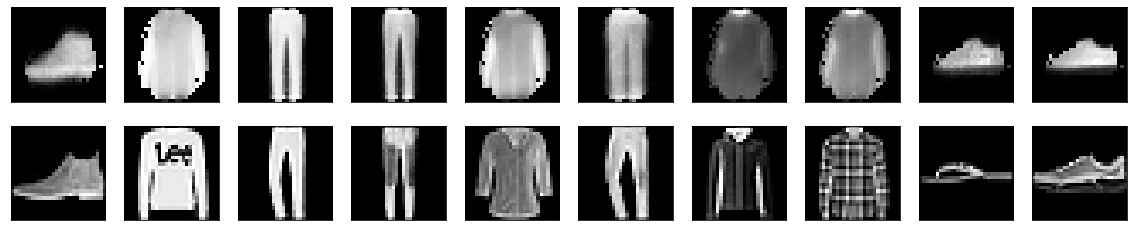

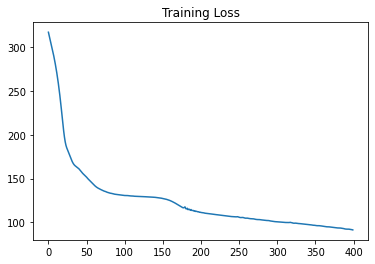

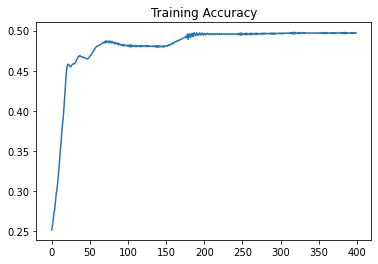

In [ ]:
main()